In [1]:
#import the libraries
import pandas as pd
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM ,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [48]:
#MACRO DEF

STOCK = 'CL=F'
EPOCHS = 100
model_path = 'machine learning model/'+STOCK+'_model.pkl'
START_DATE = '2012-01-01'
END_DATE = '2022-02-28'
PREDICT_DATE = '2022-03-01'
ERR_EPOCHS = 120

In [3]:


#get the stock data
df = web.DataReader(STOCK, data_source='yahoo' , start=START_DATE , end=END_DATE)

#show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,103.180000,99.650002,99.699997,102.959999,275481.0,102.959999
2012-01-04,103.739998,101.879997,102.989998,103.220001,271711.0,103.220001
2012-01-05,103.730003,101.300003,103.290001,101.809998,295615.0,101.809998
2012-01-06,102.800003,100.879997,101.349998,101.559998,290458.0,101.559998
2012-01-09,102.150002,100.099998,101.919998,101.309998,311866.0,101.309998
...,...,...,...,...,...,...
2022-02-22,96.000000,90.349998,91.750000,92.349998,789041.0,92.349998
2022-02-23,93.900002,90.639999,91.739998,92.099998,440574.0,92.099998
2022-02-24,100.540001,91.449997,92.519997,92.809998,872244.0,92.809998


In [4]:
#get the number of rows and column in the data set
df.shape

(2555, 6)

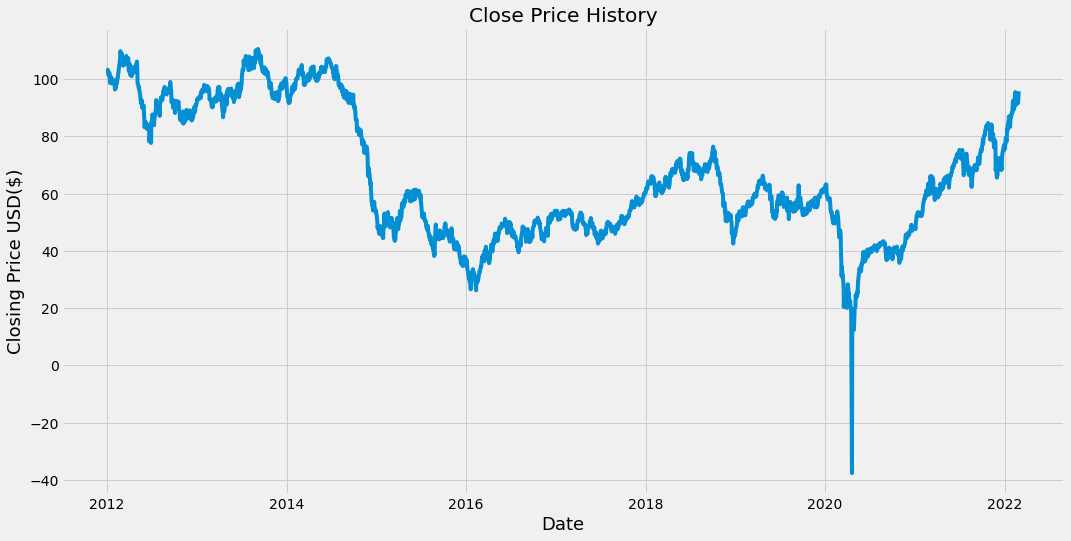

In [5]:
#Visualing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD($)', fontsize=18)
plt.show()

In [6]:
#Create a new data
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

2044

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.94890659],
       [0.95066146],
       [0.9411447 ],
       ...,
       [0.88039956],
       [0.87216521],
       [0.90004051]])

In [8]:
#creating the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.94890659, 0.95066146, 0.9411447 , 0.93945734, 0.93776997,
       0.94404697, 0.93480024, 0.92285367, 0.92015388, 0.9337203 ,
       0.93291035, 0.93156048, 0.91853402, 0.92609343, 0.92184124,
       0.92487853, 0.92690334, 0.92595842, 0.92069384, 0.91866904,
       0.91279699, 0.90436016, 0.91434934, 0.90807239, 0.91819658,
       0.92022138, 0.92784826, 0.9199514 , 0.93507023, 0.93392278,
       0.94107724, 0.94451943, 0.95079643, 0.96834502, 0.97131479,
       0.98177648, 0.9948704 , 0.98670356, 0.97313718, 0.97664687,
       0.9885934 , 0.97414956, 0.97428457, 0.96065064, 0.97050489,
       0.97333965, 0.97887421, 0.97171975, 0.97421706, 0.96557776,
       0.96341794, 0.97657937, 0.9835313 , 0.96679267, 0.97799675,
       0.96503779, 0.975297  , 0.97637689, 0.97840175, 0.9654428 ])]
[0.9476916846113552]

[array([0.94890659, 0.95066146, 0.9411447 , 0.93945734, 0.93776997,
       0.94404697, 0.93480024, 0.92285367, 0.92015388, 0.9337203 ,
       0.93291035, 0.93156048, 0.918

In [9]:
#Convert the X_train and Y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1984, 60, 1)

In [11]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))

#adding a fourth fifth layer and some Dropout regularistion
model.add(LSTM(units = 50, return_sequences = False))

model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
'''for i in range(10):
    model.fit(x_train, y_train, batch_size=32, epochs=i)
    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    #convert the data to a numpy array
    x_test = np.array(x_test)
    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the models predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    print(rmse)
    #plot the date
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    #visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    print(valid)'''
    
    
    

    

"for i in range(10):\n    model.fit(x_train, y_train, batch_size=32, epochs=i)\n    #create the testing data set\n    #create a new array containing scaled values from index 1543 to 2003\n    test_data = scaled_data[training_data_len - 60: , :]\n    #create the data sets x_test adn y_test\n    x_test = []\n    y_test = dataset[training_data_len:,:]\n    for i in range(60, len(test_data)):\n        x_test.append(test_data[i-60:i,0])\n    #convert the data to a numpy array\n    x_test = np.array(x_test)\n    #resahpe the data\n    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))\n    #get the models predicted price values\n    predictions = model.predict(x_test)\n    predictions = scaler.inverse_transform(predictions)\n    #get the root mean squared error (RMSE)\n    rmse =  np.sqrt(np.mean(predictions - y_test)**2)\n    print(rmse)\n    #plot the date\n    train = data[:training_data_len]\n    valid = data[training_data_len:]\n    valid['Predictions'] = predictions\n    #

In [14]:
'''rmse=10
while(rmse>0.1):
    #train the model
    model.fit(x_train, y_train, batch_size=32, epochs=1)
    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    #convert the data to a numpy array
    x_test = np.array(x_test)
    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the models predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    print(rmse)'''
    
    


'rmse=10\nwhile(rmse>0.1):\n    #train the model\n    model.fit(x_train, y_train, batch_size=32, epochs=1)\n    #create the testing data set\n    #create a new array containing scaled values from index 1543 to 2003\n    test_data = scaled_data[training_data_len - 60: , :]\n    #create the data sets x_test adn y_test\n    x_test = []\n    y_test = dataset[training_data_len:,:]\n    for i in range(60, len(test_data)):\n        x_test.append(test_data[i-60:i,0])\n    #convert the data to a numpy array\n    x_test = np.array(x_test)\n    #resahpe the data\n    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))\n    #get the models predicted price values\n    predictions = model.predict(x_test)\n    predictions = scaler.inverse_transform(predictions)\n    #get the root mean squared error (RMSE)\n    rmse =  np.sqrt(np.mean(predictions - y_test)**2)\n    print(rmse)'

In [15]:
#train the STOCK PRICE PREDICTION model
model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS)

Epoch 1/100
62/62 [==============================] - 15s 72ms/step - loss: 0.0315
Epoch 2/100
62/62 [==============================] - 4s 72ms/step - loss: 0.0013
Epoch 3/100
62/62 [==============================] - 5s 73ms/step - loss: 4.4685e-04
Epoch 4/100
62/62 [==============================] - 5s 73ms/step - loss: 3.8564e-04
Epoch 5/100
62/62 [==============================] - 4s 71ms/step - loss: 3.7723e-04
Epoch 6/100
62/62 [==============================] - 4s 71ms/step - loss: 3.7659e-04
Epoch 7/100
62/62 [==============================] - 4s 72ms/step - loss: 3.8209e-04
Epoch 8/100
62/62 [==============================] - 4s 73ms/step - loss: 3.3155e-04
Epoch 9/100
62/62 [==============================] - 4s 72ms/step - loss: 3.3948e-04
Epoch 10/100
62/62 [==============================] - 4s 71ms/step - loss: 3.2641e-04
Epoch 11/100
62/62 [==============================] - 4s 71ms/step - loss: 3.0936e-04
Epoch 12/100
62/62 [==============================] - 4s 71ms/step - l

62/62 [==============================] - 5s 82ms/step - loss: 1.1137e-04
Epoch 97/100
62/62 [==============================] - 5s 78ms/step - loss: 1.0602e-04
Epoch 98/100
62/62 [==============================] - 4s 72ms/step - loss: 9.9994e-05
Epoch 99/100
62/62 [==============================] - 4s 72ms/step - loss: 9.2257e-05
Epoch 100/100
62/62 [==============================] - 4s 72ms/step - loss: 1.0454e-04


In [16]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test adn y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

    
    


In [17]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
#resahpe the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [19]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

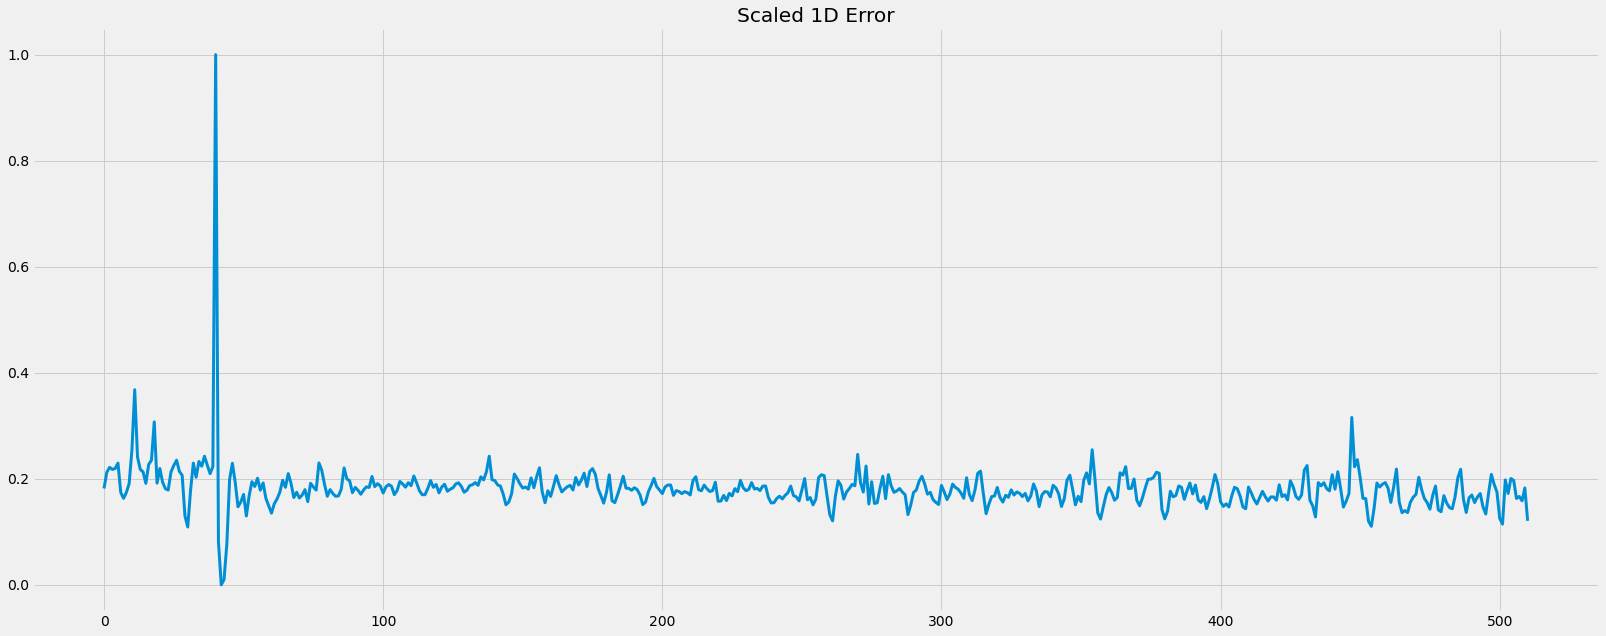

1.828042106969016


In [20]:
#get the root mean squared error (RMSE)
error = []
error.append(predictions - y_test)
nperr = np.array(predictions - y_test)
scaled_error = scaler.fit_transform(nperr)
#print(nperr)
plt.figure(figsize=(25,10))
plt.plot(scaled_error, linewidth=3)
plt.title("Scaled 1D Error")
plt.show()
rmse =  np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)
#print(predictions)

In [21]:
#THE ERROR MODEL
nperr.shape

training_errdata_len = math.ceil(len(nperr)*0.8)
training_errdata_len


409

In [22]:
#Scale the error data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_errdata = scaler.fit_transform(nperr)


In [23]:
#creating the error training data set
#create the scaled training data set
train_errdata = scaled_errdata[0:training_errdata_len,:]
#split the data into x_errtrain and y_errtrain data sets
x_errtrain = []
y_errtrain = []
for i in range(60, len(train_errdata)):
    x_errtrain.append(train_errdata[i-60:i,0])
    y_errtrain.append(train_errdata[i,0])
    if i<=61:
        print(x_errtrain)
        print(y_errtrain)
        print()

[array([0.18171658, 0.21207892, 0.22147209, 0.2175874 , 0.21935778,
       0.22949225, 0.1741539 , 0.16304593, 0.17401248, 0.19084031,
       0.25409581, 0.36800709, 0.24113685, 0.21762233, 0.21287986,
       0.19127636, 0.22693763, 0.23512585, 0.30722325, 0.19170914,
       0.21930687, 0.19331471, 0.181192  , 0.17871259, 0.21292515,
       0.22501807, 0.23490335, 0.21388283, 0.20649404, 0.12992476,
       0.10898804, 0.17766063, 0.22952572, 0.20288948, 0.23259316,
       0.22370097, 0.24254156, 0.22560882, 0.20965496, 0.22301255,
       1.        , 0.0808702 , 0.        , 0.00985253, 0.07668973,
       0.19927339, 0.22917302, 0.19339319, 0.14715021, 0.15615808,
       0.17049052, 0.129773  , 0.16822365, 0.19442697, 0.18542436,
       0.20096619, 0.17850909, 0.19200119, 0.16294075, 0.14897412])]
[0.13517573800395505]

[array([0.18171658, 0.21207892, 0.22147209, 0.2175874 , 0.21935778,
       0.22949225, 0.1741539 , 0.16304593, 0.17401248, 0.19084031,
       0.25409581, 0.36800709, 0.24

In [24]:
#Convert the X_errtrain and Y_errtrain to numpy arrays
x_errtrain , y_errtrain = np.array(x_errtrain), np.array(y_errtrain)

In [25]:
#Reshape the error data
x_errtrain = np.reshape(x_errtrain,(x_errtrain.shape[0],x_errtrain.shape[1],1))
x_errtrain.shape

(349, 60, 1)

In [26]:
#Building the LSTM error model
errmodel = Sequential()
errmodel.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))

#adding a fourth fifth layer and some Dropout regularistion
errmodel.add(LSTM(units = 50, return_sequences = True))

#adding a fourth fifth layer and some Dropout regularistion
errmodel.add(LSTM(units = 50, return_sequences = True))

#adding a fourth fifth layer and some Dropout regularistion
errmodel.add(LSTM(units = 50, return_sequences = False))

errmodel.add(Dense(25))
errmodel.add(Dense(1))

In [27]:
#compile the error Model
errmodel.compile(optimizer='adam', loss='mean_squared_error')


In [28]:
#train the error model
errmodel.fit(x_train, y_train, batch_size=32, epochs=ERR_EPOCHS)

Epoch 1/120
62/62 [==============================] - 12s 67ms/step - loss: 0.0341
Epoch 2/120
62/62 [==============================] - 7s 107ms/step - loss: 0.0013
Epoch 3/120
62/62 [==============================] - 8s 132ms/step - loss: 8.4078e-04
Epoch 4/120
62/62 [==============================] - 8s 135ms/step - loss: 8.0470e-04
Epoch 5/120
62/62 [==============================] - 8s 134ms/step - loss: 7.9436e-04
Epoch 6/120
62/62 [==============================] - 8s 133ms/step - loss: 7.8127e-04
Epoch 7/120
62/62 [==============================] - 8s 130ms/step - loss: 7.0483e-04
Epoch 8/120
62/62 [==============================] - 8s 131ms/step - loss: 6.9316e-04
Epoch 9/120
62/62 [==============================] - 8s 128ms/step - loss: 6.7960e-04
Epoch 10/120
62/62 [==============================] - 4s 62ms/step - loss: 6.4949e-04
Epoch 11/120
62/62 [==============================] - 4s 64ms/step - loss: 7.6489e-04
Epoch 12/120
62/62 [==============================] - 8s 129ms

62/62 [==============================] - 9s 146ms/step - loss: 9.8429e-05
Epoch 96/120
62/62 [==============================] - 9s 143ms/step - loss: 1.3956e-04
Epoch 97/120
62/62 [==============================] - 9s 141ms/step - loss: 9.8943e-05
Epoch 98/120
62/62 [==============================] - 9s 141ms/step - loss: 8.9744e-05
Epoch 99/120
62/62 [==============================] - 9s 141ms/step - loss: 1.2001e-04
Epoch 100/120
62/62 [==============================] - 9s 142ms/step - loss: 1.3898e-04
Epoch 101/120
62/62 [==============================] - 9s 142ms/step - loss: 1.0066e-04
Epoch 102/120
62/62 [==============================] - 9s 142ms/step - loss: 1.0162e-04
Epoch 103/120
62/62 [==============================] - 9s 139ms/step - loss: 1.1044e-04
Epoch 104/120
62/62 [==============================] - 9s 137ms/step - loss: 9.3943e-05
Epoch 105/120
62/62 [==============================] - 8s 136ms/step - loss: 1.1508e-04
Epoch 106/120
62/62 [=============================

In [29]:
#create the testing error data set
#create a new array containing scaled values 
test_errdata = scaled_errdata[training_errdata_len - 60: , :]
#create the data sets x_errtest adn y_errtest
x_errtest = []
y_errtest = nperr[training_errdata_len:,:]
for i in range(60, len(test_errdata)):
    x_errtest.append(test_errdata[i-60:i,0])


In [30]:
#convert the error data to a numpy array
x_errtest = np.array(x_errtest)



In [31]:
#resahpe the error data
x_errtest = np.reshape(x_errtest,(x_errtest.shape[0],x_errtest.shape[1],1))


In [32]:
#get the models predicted error values
errpredictions = errmodel.predict(x_errtest)
errpredictions = scaler.inverse_transform(errpredictions)

(102, 1)


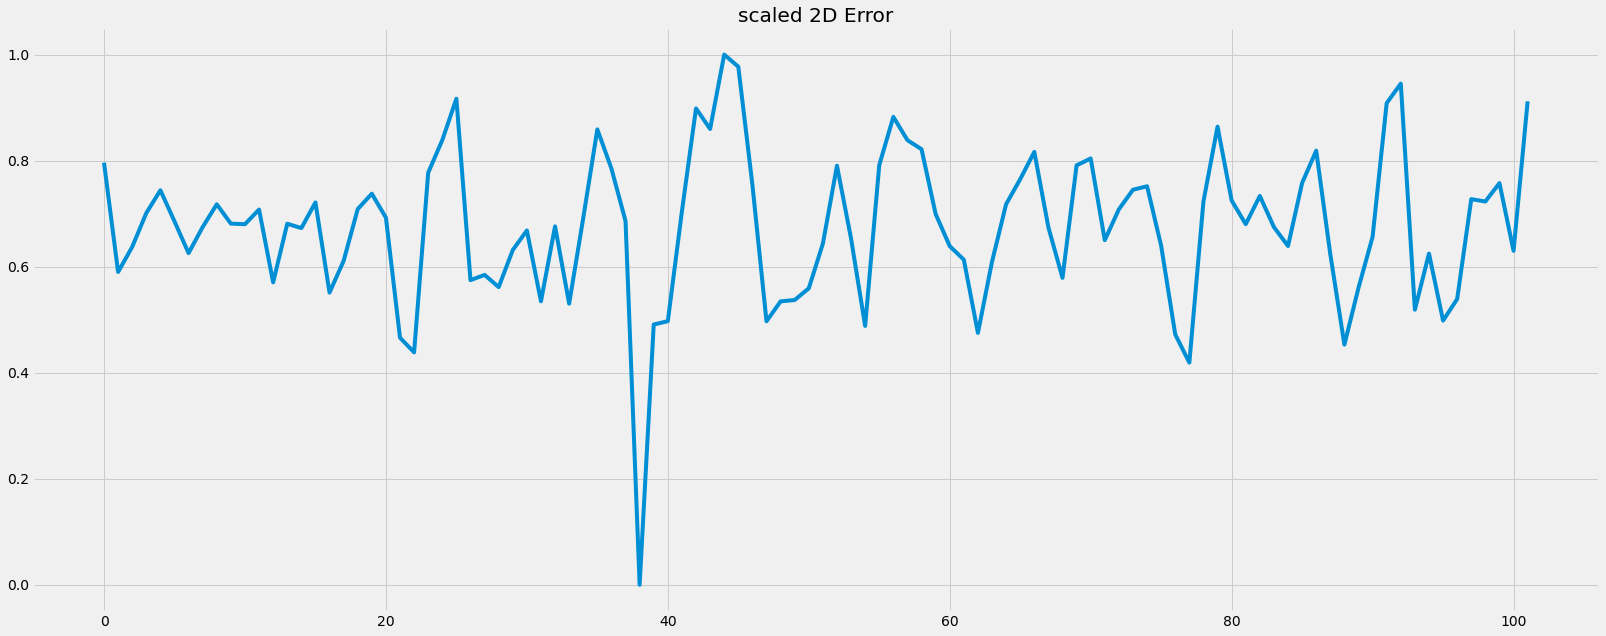

3.6466907703262916


In [33]:
#get the root mean squared error (RMSE)
error2d = []
print(errpredictions.shape)
error2d.append(errpredictions - y_errtest)
nperr2d = np.array(errpredictions - y_errtest)
scaled_error2d = scaler.fit_transform(nperr2d)
#print(nperr)
plt.figure(figsize=(25,10))
plt.plot(scaled_error2d)
plt.title('scaled 2D Error')
plt.show()
rmse2d =  np.sqrt(np.mean(errpredictions - y_errtest)**2)
print(rmse2d)
#print(errpredictions)

(511, 1)
        Error  Error Predictions   Error2d
409 -4.461006           1.022821  5.483828
410 -1.561226           0.786278  2.347504
411 -2.338959           0.728408  3.067367
412 -3.224907           0.812546  4.037453
413 -3.819557           0.872487  4.692044
..        ...                ...       ...
506 -3.083138           1.353985  4.437122
507 -2.819389           1.550600  4.369990
508 -3.399155           1.497428  4.896582
509 -1.677071           1.278605  2.955675
510 -6.074486           1.168685  7.243171

[102 rows x 3 columns]


C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


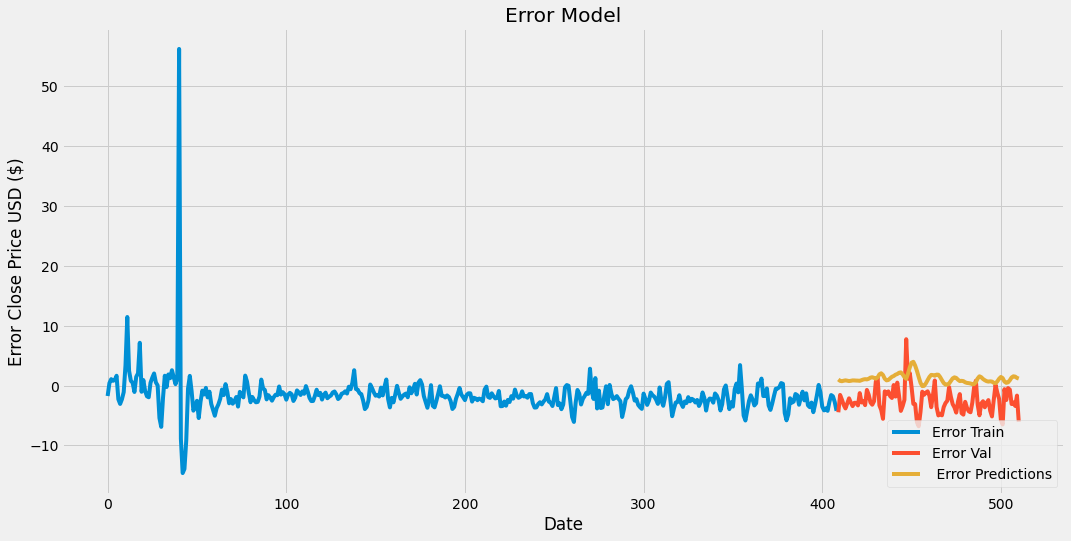

In [34]:
#plot the error data
print(nperr.shape)
dfnperr = pd.DataFrame(nperr, columns = ['Error'])
errtrain = dfnperr[:training_errdata_len]
errvalid = dfnperr[training_errdata_len:]
errvalid['Error Predictions'] = errpredictions
errvalid['Error2d'] = nperr2d
print(errvalid)
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Error Model')
plt.xlabel('Date')
plt.ylabel('Error Close Price USD ($)')
plt.plot(errtrain['Error'])
plt.plot(errvalid[['Error', 'Error Predictions']])
plt.legend(['Error Train', 'Error Val', ' Error Predictions'], loc='lower right')
plt.show()

C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


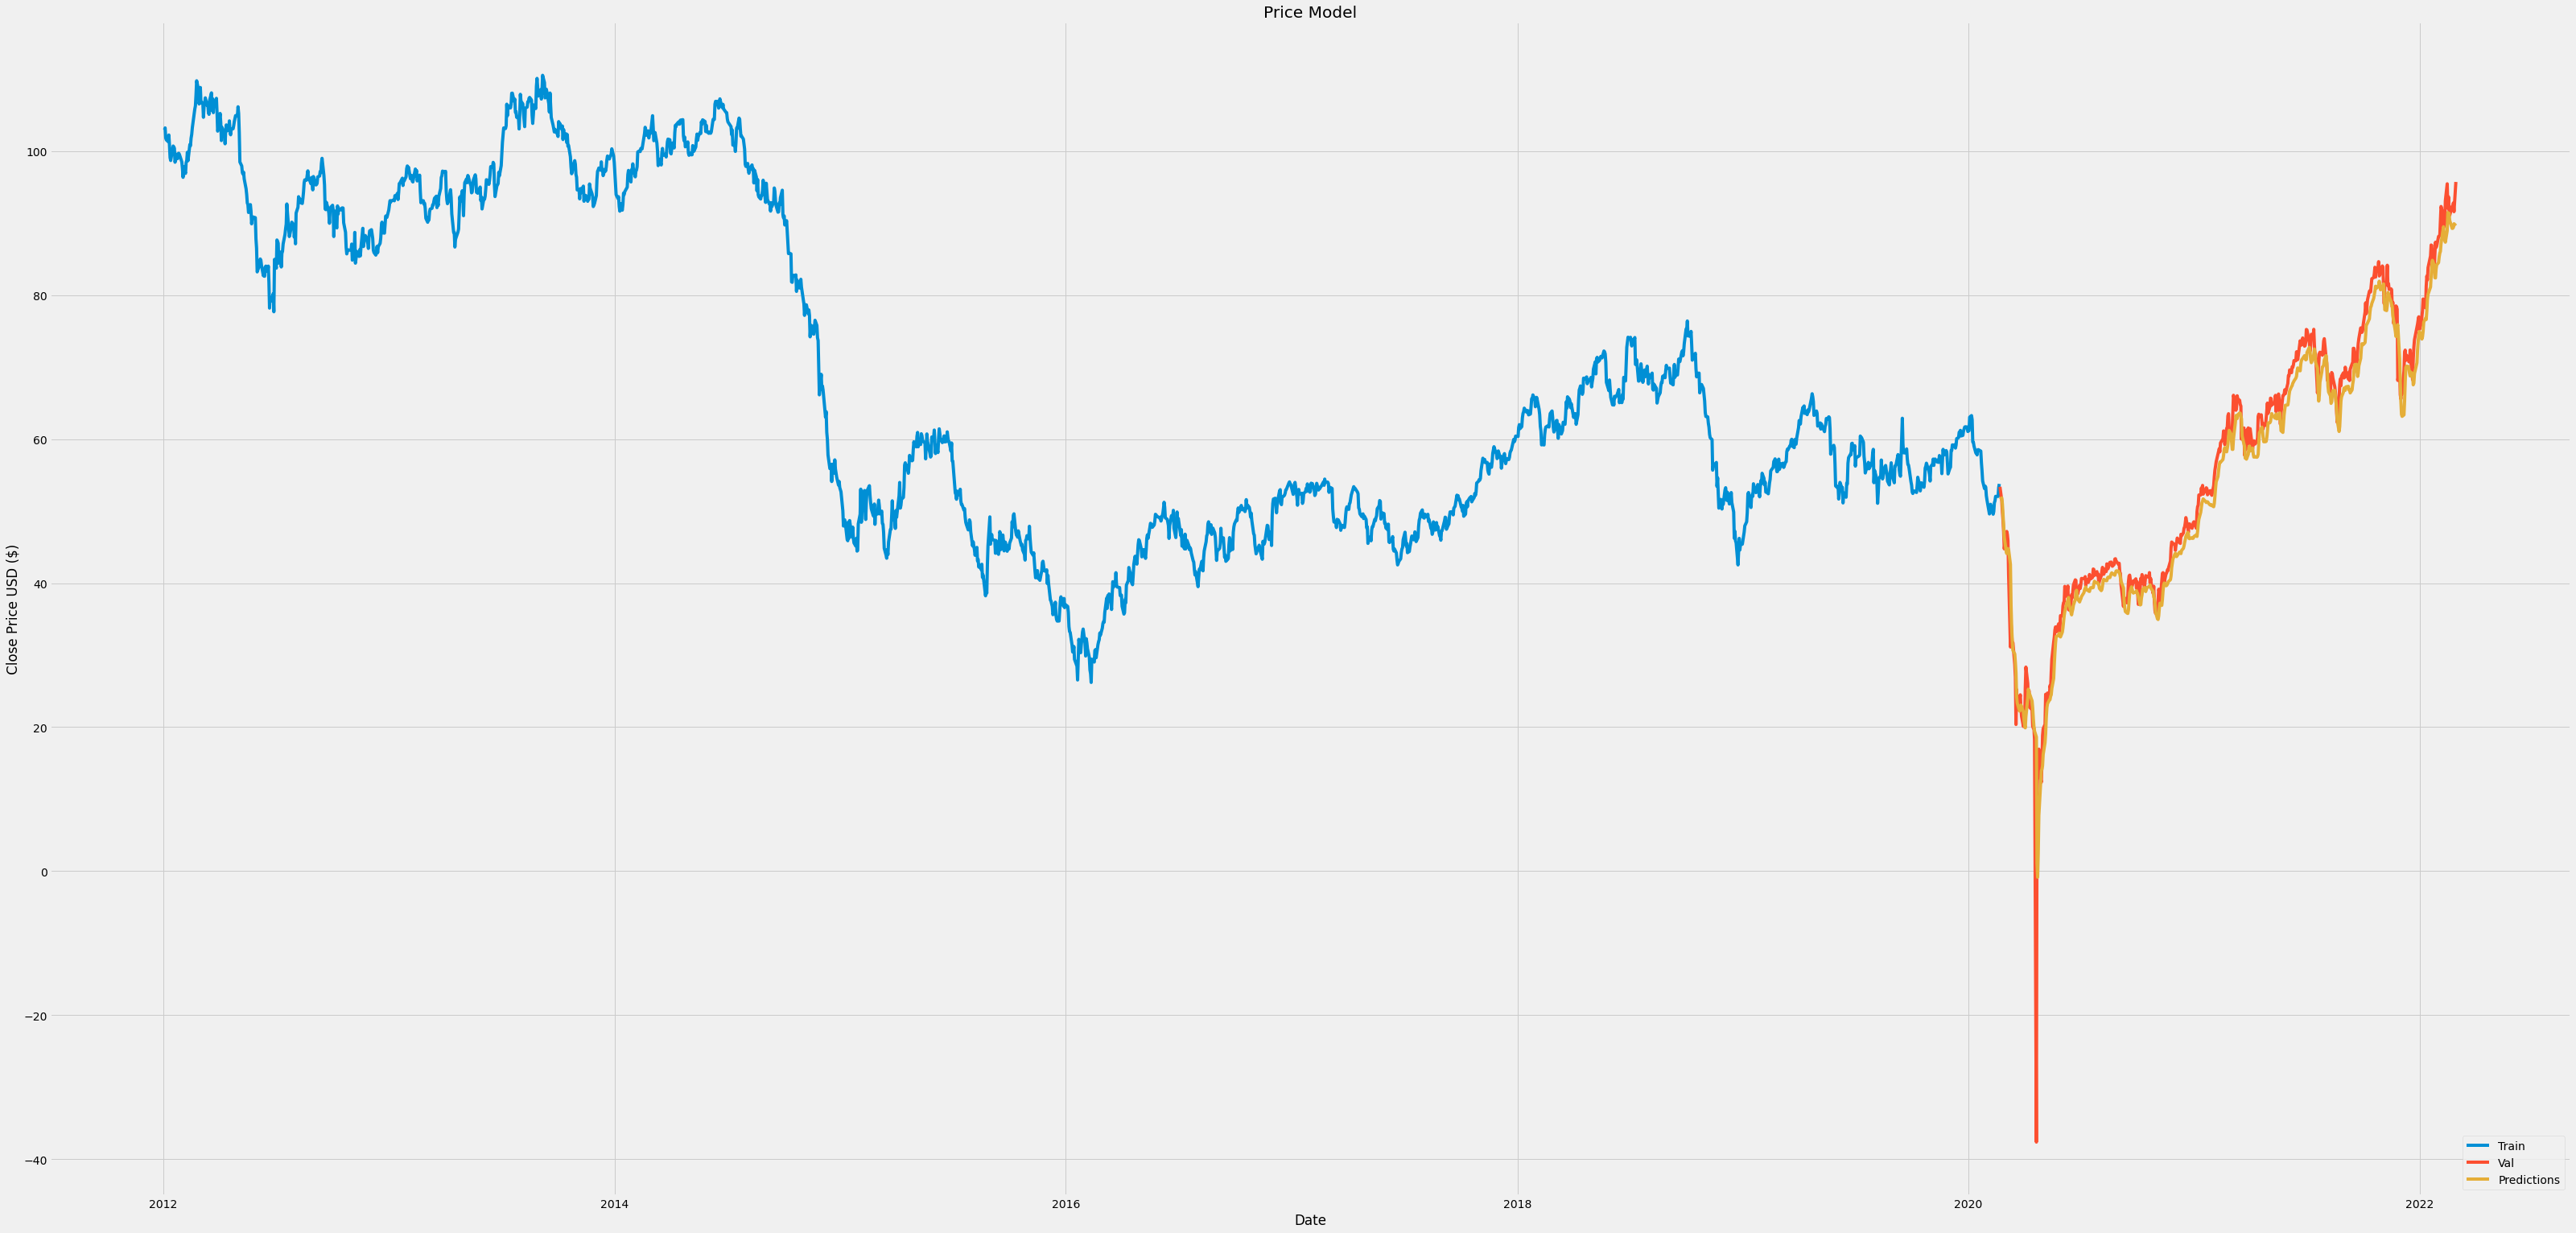

In [47]:
#plot the date
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Error'] = nperr
#visualize the data
plt.figure(figsize=(50,25))
plt.title('Price Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [36]:
#show the valid and predicted prices
valid

,Close,Predictions,Error
Date,,,
2020-02-21,53.380001,51.635342,-1.744659
2020-02-24,51.430000,51.837616,0.407616
2020-02-25,49.900002,50.973465,1.073463
2020-02-26,48.730000,49.528091,0.798092
2020-02-27,47.090000,48.013588,0.923588
...,...,...,...
2022-02-22,92.349998,89.266861,-3.083138
2022-02-23,92.099998,89.280609,-2.819389
2022-02-24,92.809998,89.410843,-3.399155


In [49]:
#get the Quote
apple_quote = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=END_DATE)
#create new data frame
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
last_60_days_error = dfnperr[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
last_60_days_scaled_error = scaler.transform(last_60_days_error)
#create the empty list
x_test = []
x_errtest=[]
#append the past 60 days
x_test.append(last_60_days_scaled)
x_errtest.append(last_60_days_scaled_error)
#convert the x_test data set to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#print(x_test.shape)
#print(x_errtest.shape)
x_errtest = np.array(x_errtest)
x_errtest = np.reshape(x_errtest,(x_errtest.shape[0],x_errtest.shape[1],1))

#get the predicted scaled price
pred_price = model.predict(x_test)
pred_error = errmodel.predict(x_errtest)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
pred_error = scaler.inverse_transform(pred_error)
print(pred_price)
print(pred_error)
new_df.tail()
dfnperr.tail()

[[73.112564]]
[[-2.6981442]]


,Error
506,-3.083138
507,-2.819389
508,-3.399155
509,-1.677071
510,-6.074486


In [50]:
print("Prediction with 1-degree of correction")
print(pred_price[0][0]-pred_error[0][0])

Prediction with 1-degree of correction
75.81071


In [51]:
apple_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
print(apple_quote2['Close'])

Date
2012-01-03    102.959999
2012-01-04    103.220001
2012-01-05    101.809998
2012-01-06    101.559998
2012-01-09    101.309998
                 ...    
2022-02-23     92.099998
2022-02-24     92.809998
2022-02-25     91.589996
2022-02-28     95.720001
2022-03-01    103.410004
Name: Close, Length: 2556, dtype: float64


In [ ]:
import joblib

joblib.dump(model,model_path)
    


In [ ]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)